In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [16]:
df='F:/Pranjali/FLIP ROBO_Internship/Assignment_Worksheet/Assignment_Oct/16Oct2020/Assignment_23Oct/Company Stock and Investment_3.csv'

In [17]:
data = pd.read_csv(df, index_col=['Date'], parse_dates=['Date'])
data.head()

,Comp_Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


In [18]:
data.tail()

,Comp_Stock
Date,
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008
2017-11-14,-0.015118
2017-11-15,-0.013190


In [19]:
# Exploratory Data Analysis (EDA)

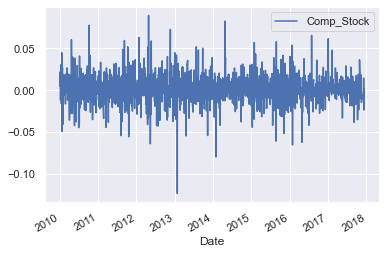

In [20]:
data.plot()

In [21]:
data.describe()

,Comp_Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


In [22]:
#In above plot data looks like seasonal data, Now we will check if data is stationary or not

In [23]:
#Moving average

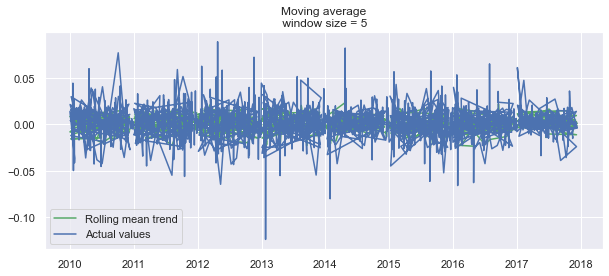

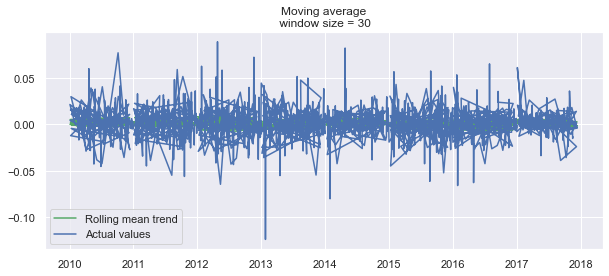

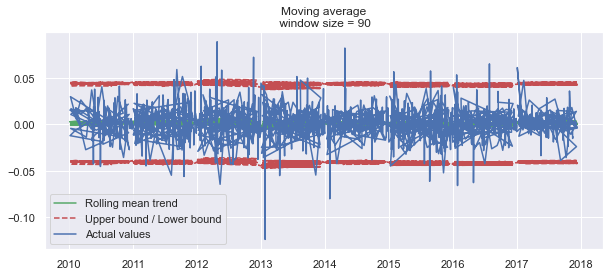

In [25]:

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(10,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Comp_Stock, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Comp_Stock, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(data.Comp_Stock, 90, plot_intervals=True)


In [26]:
#As per above graph 30-day and 90-day trend show a seasonal. This might mean that the investmnet is likely to be fluctuating with respective time.

In [ ]:
## Exponential smoothing
# Now, let’s use exponential smoothing to see if it can pick up a better trend.

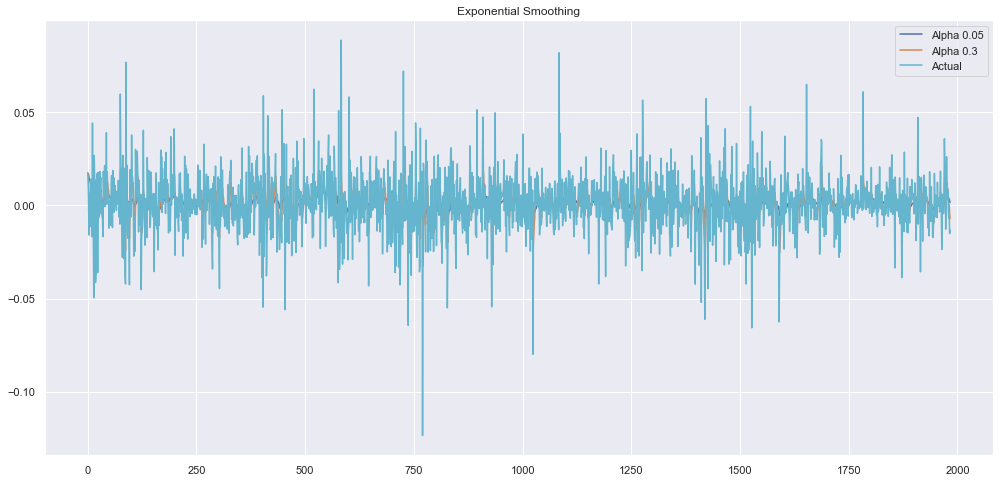

In [29]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17,8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(data.Comp_Stock, [0.05, 0.3])

In [30]:
#alpha=0.3 smoothed the curve while picking up most of the upward and downward trends in range of -0.025 to +0.025.

In [31]:
#Double exponential smoothing

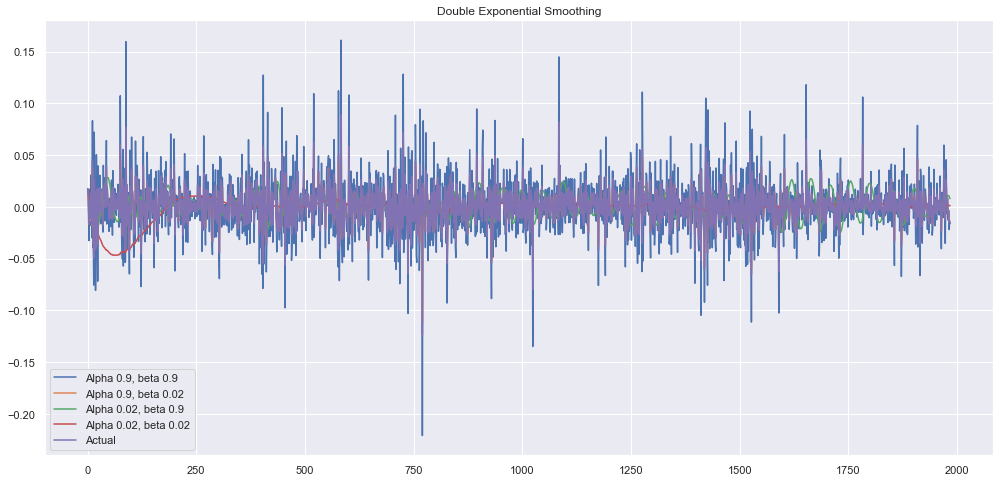

In [32]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Comp_Stock, alphas=[0.9, 0.02], betas=[0.9, 0.02])

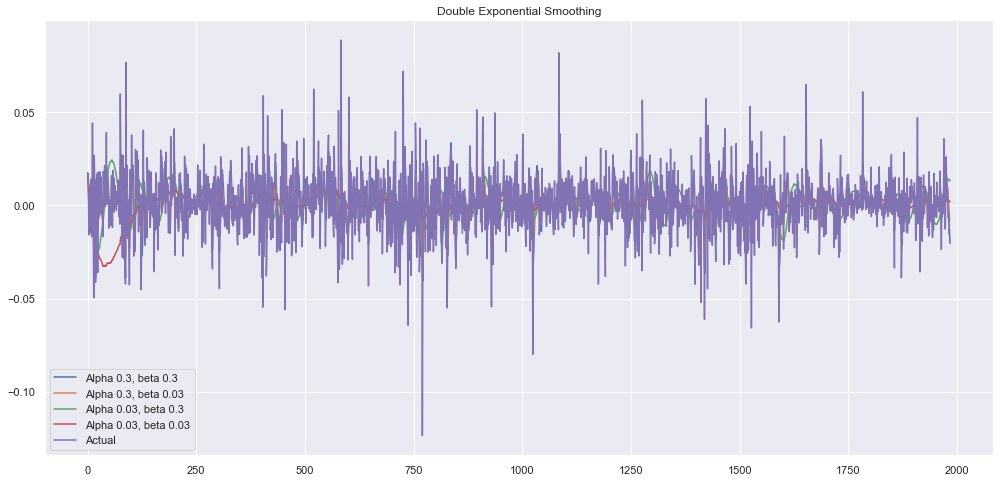

In [33]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Comp_Stock, alphas=[0.3, 0.03], betas=[0.3, 0.03])

In [ ]:
#Modelling :- As outlined previously, we must turn our series into a stationary process in order to model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process

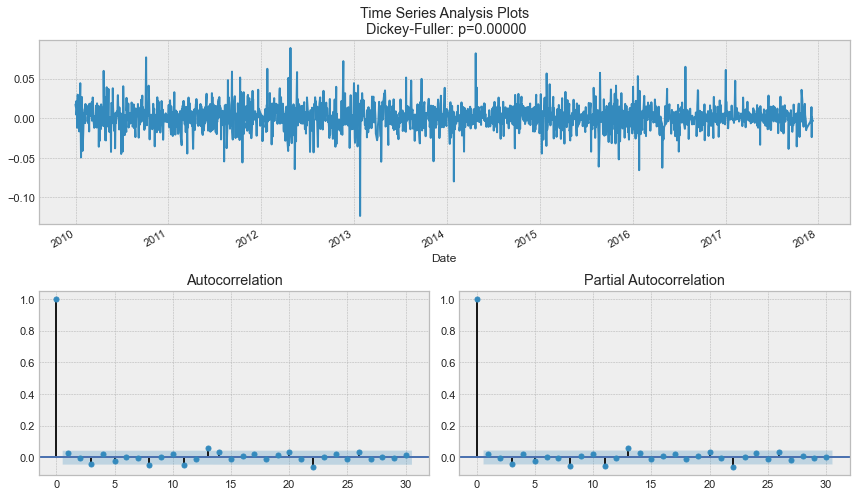

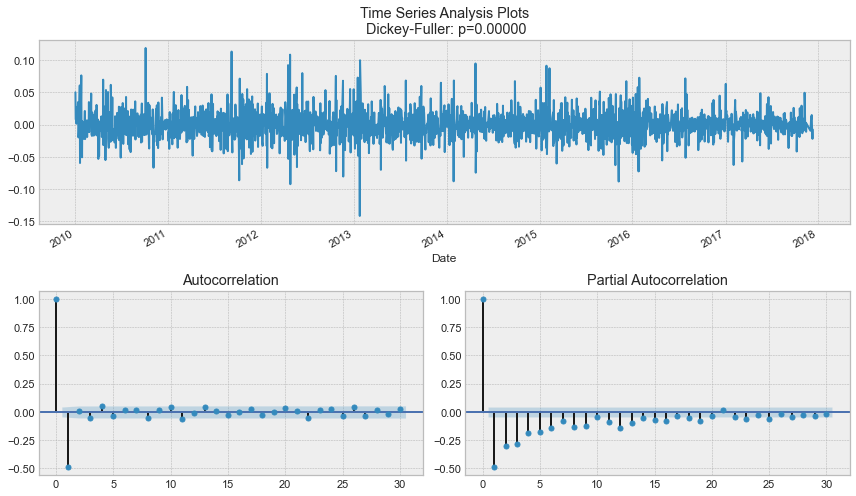

In [34]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Comp_Stock, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = data.Comp_Stock - data.Comp_Stock.shift(1)

tsplot(data_diff[1:], lags=30)

In [35]:
# Our series is now stationary and we can start modelling!

In [36]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model=ARIMA(data['Comp_Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp_Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5373.983
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sat, 31 Oct 2020   AIC                         -10739.966
Time:                        19:13:14   BIC                         -10717.597
Sample:                             1   HQIC                        -10731.749
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.868e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.26e-05
ar.L1.D.Comp_Stock     0.0284      0.023      1.217      0.224      -0.017       0.074
ma.L1.D.Comp_Stock    -0.9831      0.013    -73.359      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.2593           +0.0000j           35.2593            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

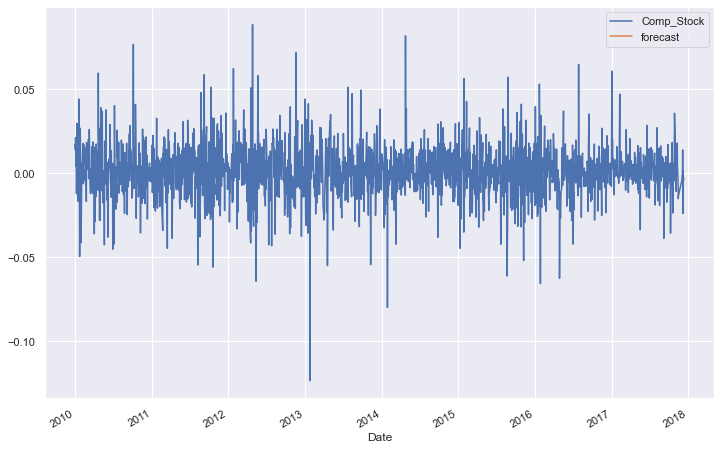

In [39]:
data['forecast']=model_fit.predict(start=1587,end=1984,dynamic=True)
data[['Comp_Stock','forecast']].plot(figsize=(12,8))

In [40]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [41]:
model=sm.tsa.statespace.SARIMAX(data['Comp_Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

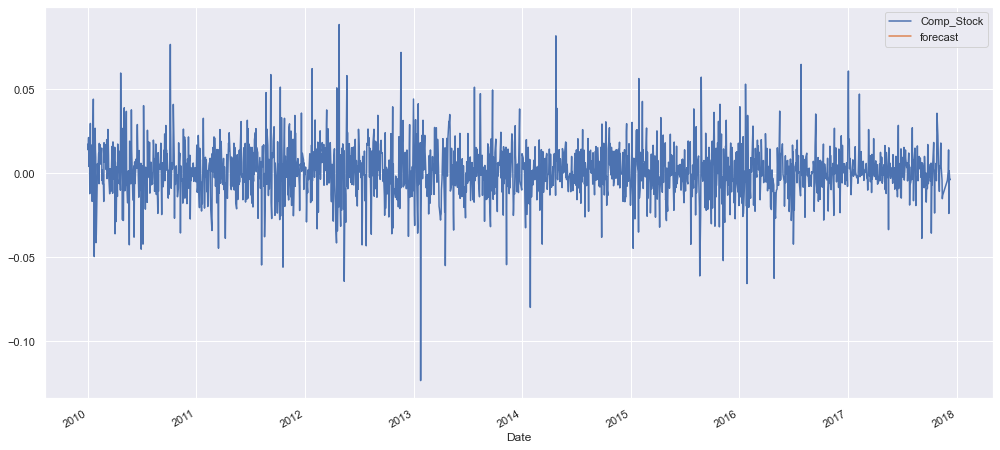

In [50]:
data['forecast']=results.predict(start=1984,end=2000,dynamic=True)
data[['Comp_Stock','forecast']].plot(figsize=(17,8))

In [43]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [44]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [45]:
future_datest_data.tail()

,Comp_Stock,forecast
2021-06-15,NaN,NaN
2021-07-15,NaN,NaN
2021-08-15,NaN,NaN
2021-09-15,NaN,NaN
2021-10-15,NaN,NaN


In [46]:
future_data=pd.concat([data,future_datest_data])

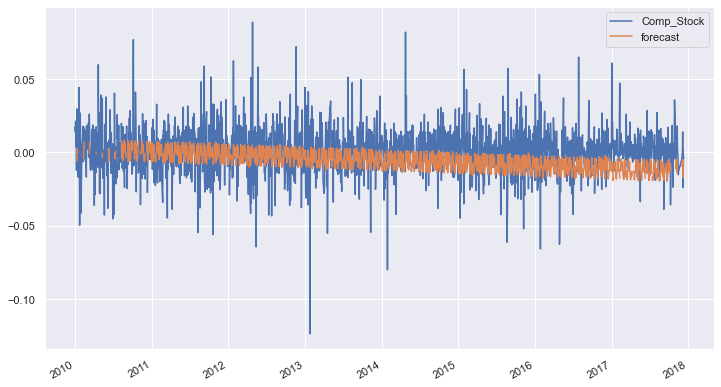

In [59]:
future_data['forecast'] = results.predict(start =150, end =1950, dynamic= True)  
future_data[['Comp_Stock', 'forecast']].plot(figsize=(12, 7)) 

In [60]:
#It seems company stock uniformly steeply decreases 2017 onwards.